In [16]:
# Install libraries
!pip install nltk scikit-learn wordcloud

# Import all required libraries
import pandas as pd
import json
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download the stopwords data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Define the path to your JSON file
file_path = '/content/recipes.json'  # <-- Your specific path

# Load the JSON file
with open(file_path, 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
recipes_df = pd.DataFrame(data)

# Display the first 5 rows to check your columns
print("Original Data (from your file):")
recipes_df.head()

Original Data (from your file):


,RecipeName,Ingredients,Steps,Cuisine
0,Butter Chicken (Murgh Makhani),"[500g boneless chicken, cubed, 1 cup tomato pu...",[Marinate chicken with marinade ingredients fo...,North Indian
1,Chicken Tikka Masala,[500g boneless chicken (from Butter Chicken ma...,[Marinate and cook chicken tikka as in the But...,North Indian
2,Chana Masala,[2 cups boiled chickpeas (canned or pressure-c...,[Heat oil in a pan. Add cumin seeds and let th...,North Indian
3,Palak Paneer,"[250g paneer (Indian cottage cheese), cubed, 1...","[Blanch spinach in hot water for 2-3 minutes, ...",North Indian
4,Dal Makhani,"[1 cup whole black lentils (urad dal), 1/4 cup...",[Soak lentils and kidney beans overnight. Pres...,North Indian


In [18]:
def clean_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ""

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers

    # Remove stopwords
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    return ' '.join(words)

recipes_df['cleaned_ingredients'] = recipes_df['Ingredients'].apply(lambda x: ' '.join(x)).apply(clean_text)

# Display the DataFrame with the new cleaned column
print("\nData after cleaning ingredients:")
# Use your column names 'RecipeName' and 'Ingredients'
recipes_df[['RecipeName', 'Ingredients', 'cleaned_ingredients']].head()


Data after cleaning ingredients:


,RecipeName,Ingredients,cleaned_ingredients
0,Butter Chicken (Murgh Makhani),"[500g boneless chicken, cubed, 1 cup tomato pu...",g boneless chicken cubed cup tomato puree cup ...
1,Chicken Tikka Masala,[500g boneless chicken (from Butter Chicken ma...,g boneless chicken butter chicken marinade lar...
2,Chana Masala,[2 cups boiled chickpeas (canned or pressure-c...,cups boiled chickpeas canned pressurecooked la...
3,Palak Paneer,"[250g paneer (Indian cottage cheese), cubed, 1...",g paneer indian cottage cheese cubed large bun...
4,Dal Makhani,"[1 cup whole black lentils (urad dal), 1/4 cup...",cup whole black lentils urad dal cup kidney be...


In [19]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Create the TF-IDF matrix by fitting and transforming the cleaned text
tfidf_matrix = vectorizer.fit_transform(recipes_df['cleaned_ingredients'])

print("\nShape of the TF-IDF matrix:")
print(tfidf_matrix.shape)


Shape of the TF-IDF matrix:
(99, 396)


In [20]:
def recommend_recipes(user_input, top_n=5):
    # 1. Clean the user's input
    user_input_cleaned = clean_text(user_input)

    # 2. Transform the cleaned input into a TF-IDF vector
    user_tfidf = vectorizer.transform([user_input_cleaned])

    # 3. Calculate cosine similarity
    cosine_similarities = cosine_similarity(user_tfidf, tfidf_matrix).flatten()

    # 4. Get the indices of the top 'n' most similar recipes
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]

    # 5. --- CORRECTED CODE ---
    # Return your actual column names: 'RecipeName' and 'Ingredients'
    return recipes_df.iloc[top_indices][['RecipeName', 'Ingredients']]

In [21]:
# --- Test Example 1 ---
user_ingredients = "chicken onion tomato garlic"
print(f"Recommendations for: '{user_ingredients}'\n")

recommendations = recommend_recipes(user_ingredients)
print(recommendations)


Recommendations for: 'chicken onion tomato garlic'

                        RecipeName  \
1             Chicken Tikka Masala   
41                Chicken Vindaloo   
47                 Goan Fish Curry   
91         Spinach Dal (Palak Dal)   
0   Butter Chicken (Murgh Makhani)   

                                          Ingredients  
1   [500g boneless chicken (from Butter Chicken ma...  
41  [500g chicken, cut into pieces, 2 large potato...  
47  [500g firm white fish (like pomfret or kingfis...  
91  [1 cup toor dal (pigeon peas), 1 bunch fresh s...  
0   [500g boneless chicken, cubed, 1 cup tomato pu...  


In [26]:
import pickle
from google.colab import files

# --- This is the new part ---

# 1. Save the vectorizer object
# (This knows how to turn "chicken tomato" into numbers)
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# 2. Save the TF-IDF matrix
# (This has all the number vectors for all your recipes)
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

print("Saved 'vectorizer.pkl' and 'tfidf_matrix.pkl' to Colab.")

# 3. Download the files to your computer
print("Downloading files...")
files.download('vectorizer.pkl')
files.download('tfidf_matrix.pkl')

Saved 'vectorizer.pkl' and 'tfidf_matrix.pkl' to Colab.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# --- Test Example 2 ---
user_ingredients_2 = "flour sugar egg butter"
print(f"\nRecommendations for: '{user_ingredients_2}'\n")

recommendations_2 = recommend_recipes(user_ingredients_2)
print(recommendations_2)


Recommendations for: 'flour sugar egg butter'

                     RecipeName  \
46                   Chicken 65   
8                          Naan   
22                       Jalebi   
52                 Shahi Paneer   
72  Chicken Kebab (Seekh Kebab)   

                                          Ingredients  
46  [500g boneless chicken, cut into small cubes, ...  
8   [2 cups all-purpose flour, 1/2 cup warm milk, ...  
22  [Batter: 1 cup all-purpose flour, 1 tbsp gram ...  
52  [250g paneer, cubed, 1 large onion, boiled, 2 ...  
72  [500g chicken mince (keema), 1 large onion, fi...  


In [23]:
# Combine all cleaned ingredients into one long string
all_words = ' '.join(recipes_df['cleaned_ingredients']).split()

# Get the 20 most common words
freq_words = Counter(all_words).most_common(20)

print("\nTop 20 Most Frequent Ingredients:")
print(freq_words)


Top 20 Most Frequent Ingredients:
[('tsp', 315), ('tbsp', 176), ('cup', 172), ('powder', 143), ('chopped', 108), ('salt', 97), ('taste', 73), ('large', 67), ('seeds', 67), ('oil', 66), ('red', 65), ('finely', 59), ('onion', 58), ('paste', 58), ('chili', 56), ('turmeric', 53), ('masala', 50), ('green', 45), ('gingergarlic', 43), ('cups', 42)]



Ingredient Word Cloud:


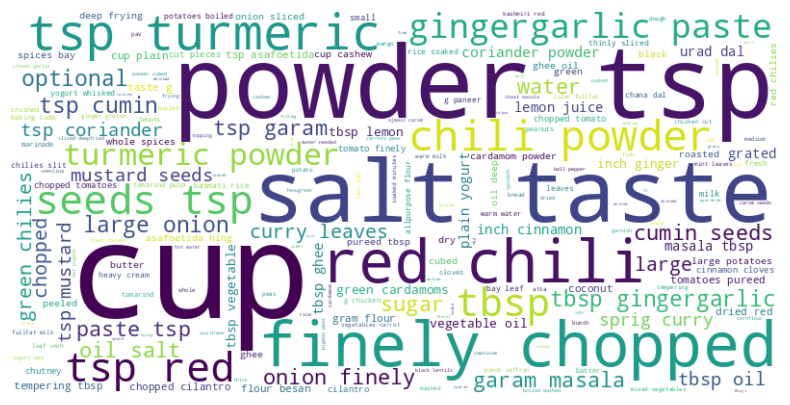

In [24]:
# Generate the word cloud string
wordcloud_text = ' '.join(all_words)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      colormap='viridis').generate(wordcloud_text)

# Plot the WordCloud
print("\nIngredient Word Cloud:")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [25]:
# Save the DataFrame to a CSV file
recipes_df.to_csv('cleaned_recipes.csv', index=False)

print("\n'cleaned_recipes.csv' saved successfully.")

# Download the file from Colab to your local machine
from google.colab import files
files.download('cleaned_recipes.csv')


'cleaned_recipes.csv' saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>